In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "your_file.xlsm"  # Replace with your file path
df = pd.read_excel(file_path, sheet_name="Data", engine="openpyxl")

# Compute Reward
df["Reward"] = df.apply(
    lambda row: row["Pts"] if str(row["O/D"]).lower() == "o"
    else -row["Pts"] if str(row["O/D"]).lower() == "d"
    else 0,
    axis=1
)

# Identify and clean action columns
action_cols = [col for col in df.columns if col.startswith("A-")]
df[action_cols] = df[action_cols].astype(str).replace("nan", np.nan)
df = df.dropna(subset=action_cols, how="all")  # remove rows where all actions are NaN

# Combine actions into a sequence string (ignoring missing intermediate steps)
df["Action_Sequence"] = df[action_cols].apply(lambda row: " -> ".join(row.dropna().astype(str)), axis=1)

# Group by sequence and compute statistics
seq_stats = (
    df.groupby("Action_Sequence")["Reward"]
      .agg(["mean", "std", "count", "sum"])
      .fillna(0)
)

# Weighted scoring system:
#   reward_score = (mean * log(count+1))
# This balances high average performance with frequency (consistency)
seq_stats["Weighted_Score"] = seq_stats["mean"] * np.log1p(seq_stats["count"])

# Rank by weighted score
seq_stats = seq_stats.sort_values("Weighted_Score", ascending=False)

# Display summary
print("=== Top 10 Action Sequences (Weighted by Frequency & Reward) ===")
print(seq_stats.head(10))

print("\n=== Bottom 10 Action Sequences ===")
print(seq_stats.tail(10))

# Visualization
top10 = seq_stats.head(20)
plt.figure(figsize=(10, 5))
sns.barplot(y=top10.index, x=top10["Weighted_Score"], palette="coolwarm")
plt.title("Top 10 Action Sequences by Weighted Reward Score")
plt.xlabel("Weighted Score (mean × log(count+1))")
plt.ylabel("Action Sequence")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
top_of_range = 101

In [3]:
file_path = './csv/line_score.csv'

In [4]:
line_score = pd.read_csv(file_path)

In [5]:
line_score

,game_date_est,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,...,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
0,1946-11-01 00:00:00,NaN,24600001,1610610035,HUS,Toronto,Huskies,-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0
1,1946-11-02 00:00:00,NaN,24600003,1610610034,BOM,St. Louis,Bombers,-,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0
2,1946-11-02 00:00:00,NaN,24600002,1610612738,BOS,Boston,Celtics,-,10.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
3,1946-11-02 00:00:00,NaN,24600004,1610610025,CHS,Chicago,Stags,-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
4,1946-11-02 00:00:00,NaN,24600005,1610610036,WAS,Washington,Capitols,-,21.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58048,2023-06-07 00:00:00,1.0,42200403,1610612748,MIA,Miami,Heat,1-2,24.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0
58049,2023-06-09 00:00:00,1.0,42200404,1610612748,MIA,Miami,Heat,1-3,21.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0
58050,2023-06-12 00:00:00,1.0,42200405,1610612743,DEN,Denver,Nuggets,4-1,22.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
58051,2023-02-19 00:00:00,1.0,32200001,1610616834,LBN,Team,LeBron,0-1,46.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0


In [6]:
line_score['date'] = pd.to_datetime(line_score['game_date_est'])

In [7]:
line_score.drop('game_date_est', axis=1, inplace=True)

In [8]:
toronto_home_games = line_score[line_score['team_city_name_home'] == 'Toronto']
toronto_away_games = line_score[line_score['team_city_name_away'] == 'Toronto']

In [9]:
toronto_away_games

,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,...,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away,date
11,NaN,24600013,1610610028,DEF,Detroit,Falcons,-,15.0,23.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,1946-11-08
29,NaN,24600034,1610610026,CLR,Cleveland,Rebels,-,16.0,18.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1946-11-19
36,NaN,24600045,1610610036,WAS,Washington,Capitols,-,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1946-11-23
42,NaN,24600051,1610610036,WAS,Washington,Capitols,-,22.0,12.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,1946-11-26
52,NaN,24600062,1610610032,PRO,Providence,Steamrollers,-,30.0,12.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,1946-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57815,3.0,22201132,1610612748,MIA,Miami,Heat,40-36,23.0,24.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,2023-03-28
57855,1.0,22201163,1610612766,CHA,Charlotte,Hornets,26-53,25.0,27.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,2023-04-02
57904,6.0,22201221,1610612749,MIL,Milwaukee,Bucks,58-24,26.0,29.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,2023-04-09
57911,3.0,12200006,1610612762,UTA,Utah,Jazz,0-1,22.0,27.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,2022-10-02


In [10]:
home_games_with_record = toronto_home_games[toronto_home_games['team_wins_losses_home'] != '-']
away_games_with_record = toronto_away_games[toronto_away_games['team_wins_losses_away'] != '-']

In [11]:
home_games_with_record[['home_wins', 'home_losses']] = home_games_with_record['team_wins_losses_home'].str.split('-', expand=True).astype(int)
away_games_with_record[['away_wins', 'away_losses']] = away_games_with_record['team_wins_losses_away'].str.split('-', expand=True).astype(int)

/tmp/ipykernel_302273/1276666710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_games_with_record[['home_wins', 'home_losses']] = home_games_with_record['team_wins_losses_home'].str.split('-', expand=True).astype(int)
/tmp/ipykernel_302273/1276666710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_games_with_record[['home_wins', 'home_losses']] = home_games_with_record['team_wins_losses_home'].str.split('-', expand=True).astype(int)
/tmp/ipykernel_302273/1276666710.py:2: SettingWithCopyWa

In [12]:
games_with_record = pd.concat([home_games_with_record, away_games_with_record])

In [13]:
games_with_record = games_with_record.fillna(0)

In [14]:
games_with_record

,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,...,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away,date,home_wins,home_losses,away_wins,away_losses
32363,2.0,40000016,1610612761,TOR,Toronto,Raptors,1-1,20.0,19.0,27.0,...,0.0,0.0,0.0,0.0,74.0,2001-04-26,1.0,1.0,0.0,0.0
32387,2.0,40000063,1610612761,TOR,Toronto,Raptors,1-1,31.0,16.0,24.0,...,0.0,0.0,0.0,0.0,97.0,2001-05-09,1.0,1.0,0.0,0.0
32390,2.0,40000064,1610612761,TOR,Toronto,Raptors,2-1,23.0,35.0,17.0,...,0.0,0.0,0.0,0.0,78.0,2001-05-11,2.0,1.0,0.0,0.0
32393,3.0,40000065,1610612761,TOR,Toronto,Raptors,2-2,18.0,18.0,25.0,...,0.0,0.0,0.0,0.0,84.0,2001-05-13,2.0,2.0,0.0,0.0
32397,1.0,40000066,1610612761,TOR,Toronto,Raptors,2-3,12.0,28.0,27.0,...,0.0,0.0,0.0,0.0,121.0,2001-05-16,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57815,3.0,22201132,1610612748,MIA,Miami,Heat,40-36,23.0,24.0,20.0,...,0.0,0.0,0.0,0.0,106.0,2023-03-28,0.0,0.0,38.0,38.0
57855,1.0,22201163,1610612766,CHA,Charlotte,Hornets,26-53,25.0,27.0,37.0,...,0.0,0.0,0.0,0.0,128.0,2023-04-02,0.0,0.0,39.0,39.0
57904,6.0,22201221,1610612749,MIL,Milwaukee,Bucks,58-24,26.0,29.0,24.0,...,0.0,0.0,0.0,0.0,121.0,2023-04-09,0.0,0.0,41.0,41.0
57911,3.0,12200006,1610612762,UTA,Utah,Jazz,0-1,22.0,27.0,15.0,...,0.0,0.0,0.0,0.0,114.0,2022-10-02,0.0,0.0,1.0,0.0


In [15]:
games_with_record['wins'] = games_with_record['home_wins'] + games_with_record['away_wins']
games_with_record['losses'] = games_with_record['home_losses'] + games_with_record['away_losses']

In [24]:
record_v_time = games_with_record[['date', 'wins', 'losses']].copy().sort_values(by=['date'])
# Sort record v time
# record_v_time.sort_values(by=['date']).reset_index(drop=True)
record_v_time

,date,wins,losses
32359,2001-04-22,0.0,1.0
32363,2001-04-26,1.0,1.0
32372,2001-04-29,1.0,2.0
32377,2001-05-02,2.0,2.0
32379,2001-05-04,3.0,2.0
...,...,...,...
57842,2023-03-31,38.0,39.0
57855,2023-04-02,39.0,39.0
57863,2023-04-04,40.0,39.0
57878,2023-04-07,40.0,41.0


In [25]:
record_v_time['ratio'] = record_v_time['wins'].astype(int) - record_v_time['losses'].astype(int)

In [26]:
record_v_time

,date,wins,losses,ratio
32359,2001-04-22,0.0,1.0,-1
32363,2001-04-26,1.0,1.0,0
32372,2001-04-29,1.0,2.0,-1
32377,2001-05-02,2.0,2.0,0
32379,2001-05-04,3.0,2.0,1
...,...,...,...,...
57842,2023-03-31,38.0,39.0,-1
57855,2023-04-02,39.0,39.0,0
57863,2023-04-04,40.0,39.0,1
57878,2023-04-07,40.0,41.0,-1


In [27]:
np.max(record_v_time['ratio'])

np.int64(37)

In [28]:
np.min(record_v_time['ratio'])

np.int64(-37)

In [29]:
record_v_time['ratio'] = record_v_time['ratio'] + abs(np.min(record_v_time['ratio'])) # bring bottom of range to 0
record_v_time['ratio'] = (record_v_time['ratio'] / np.max(record_v_time['ratio'])) * top_of_range
# (() / (np.min(record_v_time['ratio']) + np.max(record_v_time['ratio'])) * top_of_range)

In [30]:
record_v_time

,date,wins,losses,ratio
32359,2001-04-22,0.0,1.0,49.135135
32363,2001-04-26,1.0,1.0,50.500000
32372,2001-04-29,1.0,2.0,49.135135
32377,2001-05-02,2.0,2.0,50.500000
32379,2001-05-04,3.0,2.0,51.864865
...,...,...,...,...
57842,2023-03-31,38.0,39.0,49.135135
57855,2023-04-02,39.0,39.0,50.500000
57863,2023-04-04,40.0,39.0,51.864865
57878,2023-04-07,40.0,41.0,49.135135


In [31]:
yearly_record = record_v_time.groupby(record_v_time['date'].dt.year)

In [32]:
yearly_stats = yearly_record.tail(1).sort_values(by=['date'])
# Sort to avoid years being misplaced on graphs
yearly_stats

,date,wins,losses,ratio
32402,2001-05-20,3.0,4.0,49.135135
35004,2003-12-30,16.0,14.0,53.229730
36105,2004-12-29,10.0,21.0,35.486486
37295,2005-12-30,8.0,22.0,31.391892
38491,2006-12-30,13.0,18.0,43.675676
39784,2007-12-31,17.0,15.0,53.229730
41083,2008-12-31,12.0,20.0,39.581081
42346,2009-12-30,16.0,17.0,49.135135
43656,2010-12-31,11.0,21.0,36.851351
44577,2011-12-30,1.0,2.0,49.135135


In [33]:
yearly_stats['num_games'] = yearly_stats['wins'] + yearly_stats['losses']

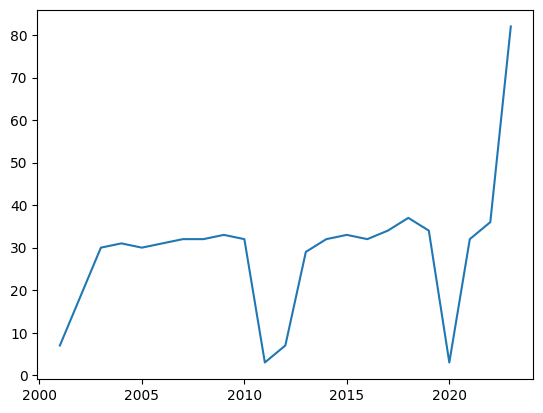

In [34]:
plt.plot(yearly_stats['date'].dt.year, yearly_stats['num_games'])

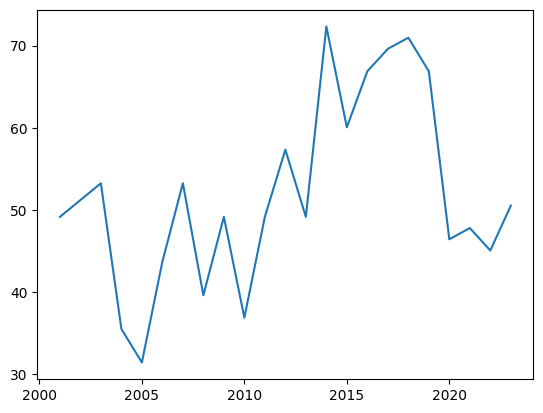

In [35]:
plt.plot(yearly_stats['date'].dt.year, yearly_stats['ratio'])

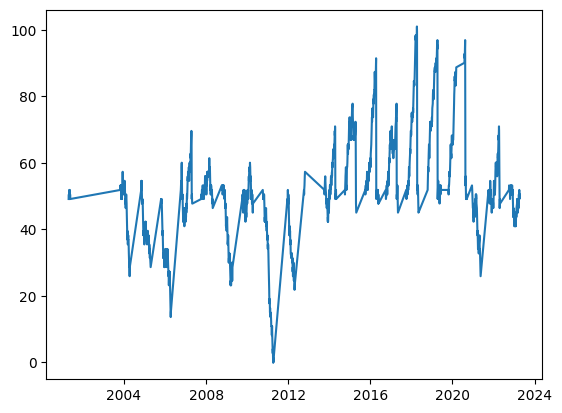

In [41]:
plt.plot(record_v_time['date'].dt.date, record_v_time['ratio'].reset_index(drop=True))

In [73]:
# Set Seaborn light theme for presentations
sns.set_theme(style="whitegrid", context="talk")
sns.set_palette("muted")

In [74]:
import itertools
color_cycle = itertools.cycle(sns.color_palette("deep"))

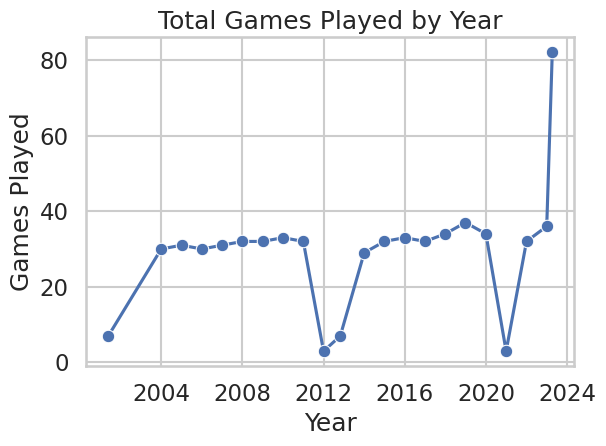

In [ ]:
plt.figure()
sns.lineplot(
    data=yearly_stats[['date', 'num_games']], 
    x='date', 
    y='num_games', 
    marker='o',
    color=next(color_cycle)
)
plt.title("Total Games Played by Year")
plt.xlabel("Year")
plt.ylabel("Games Played")
plt.tight_layout()

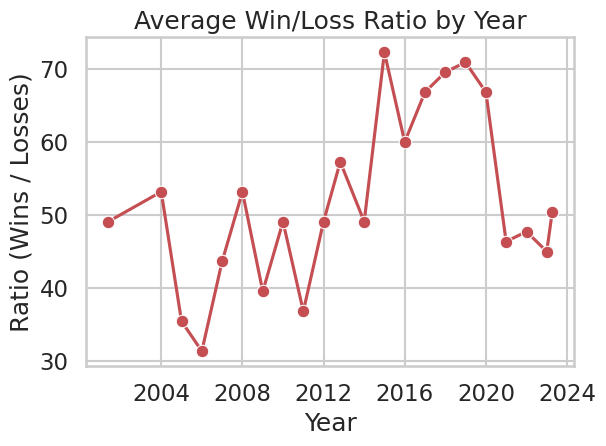

In [78]:
plt.figure()
sns.lineplot(
    data=yearly_stats[['date', 'ratio']],
    x='date',
    y='ratio',
    marker='o',
    color=next(color_cycle)
)
plt.title("Average Win/Loss Ratio by Year")
plt.xlabel("Year")
plt.ylabel("Ratio (Wins / Losses)")
plt.tight_layout()

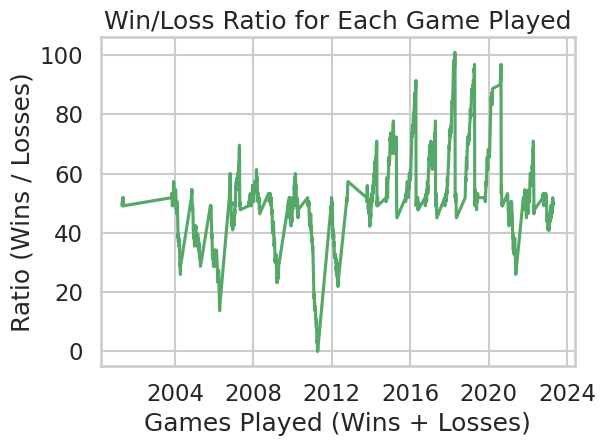

In [77]:
plt.figure()
sns.lineplot(
    data=record_v_time[['date', 'ratio']],
    x= 'date',
    y='ratio',
    # alpha=0.7,
    color=next(color_cycle)
)
plt.title("Win/Loss Ratio for Each Game Played")
plt.xlabel("Games Played (Wins + Losses)")
plt.ylabel("Ratio (Wins / Losses)")
plt.tight_layout()

plt.show()

In [ ]:
record_v_time['ratio'] + abs(np.min(record_v_time['ratio']))

32363    37
32387    37
32390    38
32393    37
32397    36
         ..
57842    36
57863    38
57878    36
57923    39
57936    38
Name: ratio, Length: 760, dtype: int64

In [ ]:
(np.min(record_v_time['ratio']) + np.max(record_v_time['ratio'])) * top_of_range

SyntaxError: unmatched ')' (2629808416.py, line 1)

In [98]:
record_v_time

,home_wins,home_losses,ratio
32363,1,1,-inf
32387,1,1,-inf
32390,2,1,-inf
32393,2,2,-inf
32397,2,3,-inf
...,...,...,...
57842,38,39,-inf
57863,40,39,-inf
57878,40,41,-inf
57923,2,0,-inf


In [ ]:
w = -x to y

In [ ]:
((w + x) / y) * 101

In [87]:
record_v_time

,home_wins,home_losses,ratio
32363,1,1,0
32387,1,1,0
32390,2,1,1
32393,2,2,0
32397,2,3,-1
...,...,...,...
57842,38,39,-1
57863,40,39,1
57878,40,41,-1
57923,2,0,2


TypeError: unhashable type: 'numpy.ndarray'

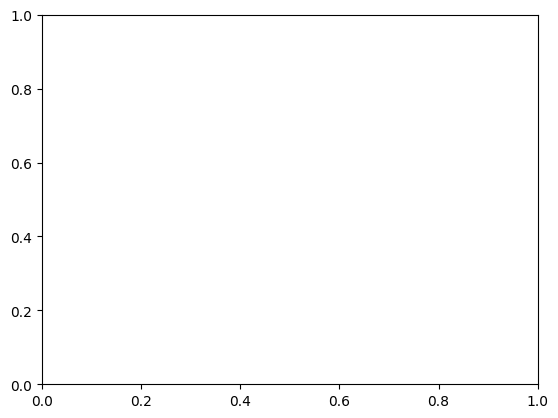

In [81]:
plt.plot(record_v_time.reset_index(drop=True))

In [ ]:
games_with_record[[]]

In [ ]:
pd.to_datetime(games_with_record['game_date_est'])

32363   2001-04-26
32387   2001-05-09
32390   2001-05-11
32393   2001-05-13
32397   2001-05-16
           ...    
57842   2023-03-31
57863   2023-04-04
57878   2023-04-07
57923   2022-10-05
57936   2022-10-07
Name: game_date_est, Length: 760, dtype: datetime64[ns]